# 1. Dataset

# 1.1 Load dataset

In [ ]:
#필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV as gs

In [ ]:
# set figure params (figure size, font size)
plt.rc('figure', figsize=(5, 5))
plt.rc('font', size=13)
plt.style.use('ggplot')

# 데이터셋
dataset=pd.read_csv('acute_inflammations.csv')

In [ ]:
df = dataset.copy()
df.columns = ['Temperature_of_patient', 'Occurrence_of_nausea','Lumbar_pain','Urine_pushing', 'Micturition_pains', 'Burning_of_urethra',
              'Class1', 'Class2']
df.head()

,Temperature_of_patient,Occurrence_of_nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning_of_urethra,Class1,Class2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [ ]:
df.shape

(120, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature_of_patient  120 non-null    float64
 1   Occurrence_of_nausea    120 non-null    int64  
 2   Lumbar_pain             120 non-null    int64  
 3   Urine_pushing           120 non-null    int64  
 4   Micturition_pains       120 non-null    int64  
 5   Burning_of_urethra      120 non-null    int64  
 6   Class1                  120 non-null    int64  
 7   Class2                  120 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 7.6 KB


In [ ]:
# check `Class` value
df['Class1'].value_counts()

Class1
0    61
1    59
Name: count, dtype: int64

In [ ]:
# check `Class` value
df['Class2'].value_counts()

Class2
0    70
1    50
Name: count, dtype: int64

In [ ]:
class1_counts = df.groupby(['Temperature_of_patient', 'Class1']).size().unstack(fill_value=0)
print(class1_counts)

Class1                  0  1
Temperature_of_patient      
35.5                    1  0
35.9                    1  1
36.0                    2  1
36.2                    1  1
36.3                    0  1
36.6                    2  2
36.7                    2  1
36.8                    0  2
36.9                    1  1
37.0                    1  7
37.1                    1  2
37.2                    1  2
37.3                    1  2
37.4                    1  1
37.5                    2  4
37.6                    0  3
37.7                    1  3
37.8                    1  2
37.9                    1  4
38.0                    2  0
38.1                    1  0
38.3                    1  0
38.5                    1  0
38.7                    1  0
38.9                    1  0
39.0                    1  0
39.4                    1  0
39.7                    1  0
40.0                    5  3
40.1                    0  1
40.2                    2  1
40.3                    1  0
40.4          

In [ ]:
# 각 attribute에 대한 Class1의 개수 계산
class1_counts_df = pd.DataFrame()
for col in df.columns[1:-2]:  # 마지막 두 열(Class1, Class2)은 제외
    class1_counts = df.groupby([col, 'Class1']).size().unstack(fill_value=0)
    class1_counts_df = pd.concat([class1_counts_df, class1_counts], axis=1)
print(class1_counts_df)

Class1   0   1   0   1   0   1   0   1   0   1
0       51  40  10  40  40   0  51  10  40  30
1       10  19  51  19  21  59  10  49  21  29


In [ ]:
# 각 attribute에 대한 Class2의 개수 계산
class1_counts_df = pd.DataFrame()
for col in df.columns[1:-2]:  # 마지막 두 열(Class1, Class2)은 제외
    class1_counts = df.groupby([col, 'Class2']).size().unstack(fill_value=0)
    class1_counts_df = pd.concat([class1_counts_df, class1_counts], axis=1)
print(class1_counts_df)

Class2   0   1   0   1   0   1   0   1   0   1
0       70  21  50   0  30  10  40  21  50  20
1        0  29  20  50  40  40  30  29  20  30


# 1.2 Preprocessing
없음

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 표준화
# scaler_std = StandardScaler()
# df['Temperature_of_patient_std'] = scaler_std.fit_transform(df[['Temperature_of_patient']])

# 정규화(Normalization)
scaler_norm = MinMaxScaler()
df['Temperature_of_patient_norm'] = scaler_norm.fit_transform(df[['Temperature_of_patient']])

# 결과 확인
# print(df[['Temperature_of_patient', 'Temperature_of_patient_std', 'Temperature_of_patient_norm']].head())
print(df[['Temperature_of_patient', 'Temperature_of_patient_norm']])

     Temperature_of_patient  Temperature_of_patient_norm
0                      35.5                     0.000000
1                      35.9                     0.066667
2                      35.9                     0.066667
3                      36.0                     0.083333
4                      36.0                     0.083333
..                      ...                          ...
115                    41.4                     0.983333
116                    41.5                     1.000000
117                    41.5                     1.000000
118                    41.5                     1.000000
119                    41.5                     1.000000

[120 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature_of_patient       120 non-null    float64
 1   Occurrence_of_nausea         120 non-null    int64  
 2   Lumbar_pain                  120 non-null    int64  
 3   Urine_pushing                120 non-null    int64  
 4   Micturition_pains            120 non-null    int64  
 5   Burning_of_urethra           120 non-null    int64  
 6   Class1                       120 non-null    int64  
 7   Class2                       120 non-null    int64  
 8   Temperature_of_patient_std   120 non-null    float64
 9   Temperature_of_patient_norm  120 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 9.5 KB


In [ ]:
df=df.drop(columns='Temperature_of_patient_std')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature_of_patient       120 non-null    float64
 1   Occurrence_of_nausea         120 non-null    int64  
 2   Lumbar_pain                  120 non-null    int64  
 3   Urine_pushing                120 non-null    int64  
 4   Micturition_pains            120 non-null    int64  
 5   Burning_of_urethra           120 non-null    int64  
 6   Class1                       120 non-null    int64  
 7   Class2                       120 non-null    int64  
 8   Temperature_of_patient_norm  120 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 8.6 KB


# 2. EDA

## 2.1 Relative frequency histogram

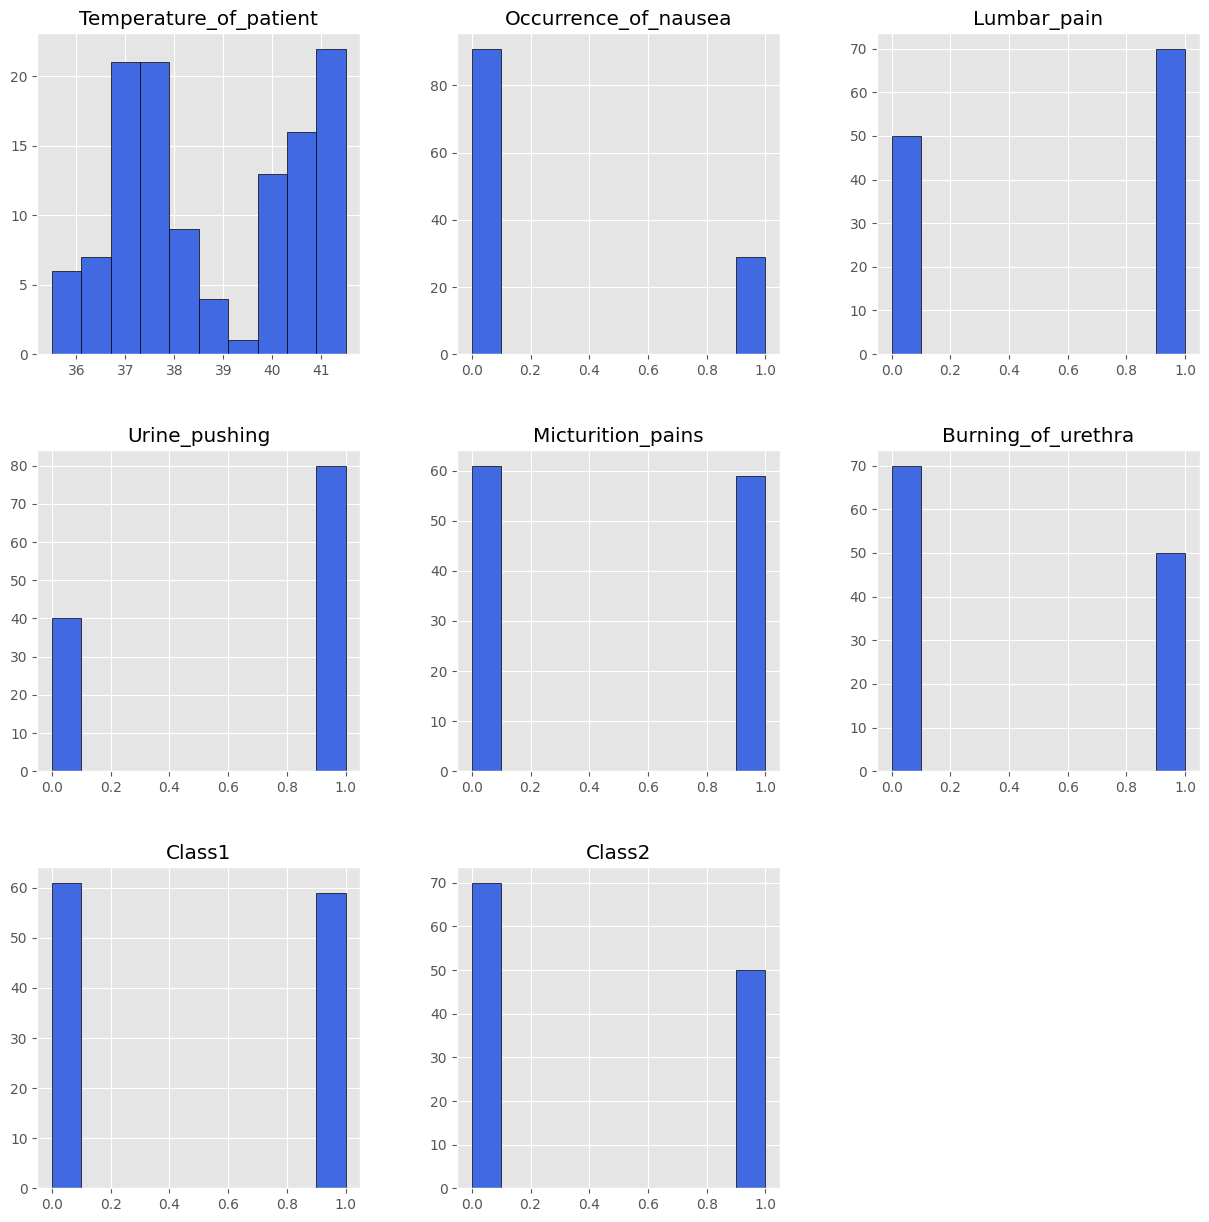

In [ ]:
# histogram
df.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

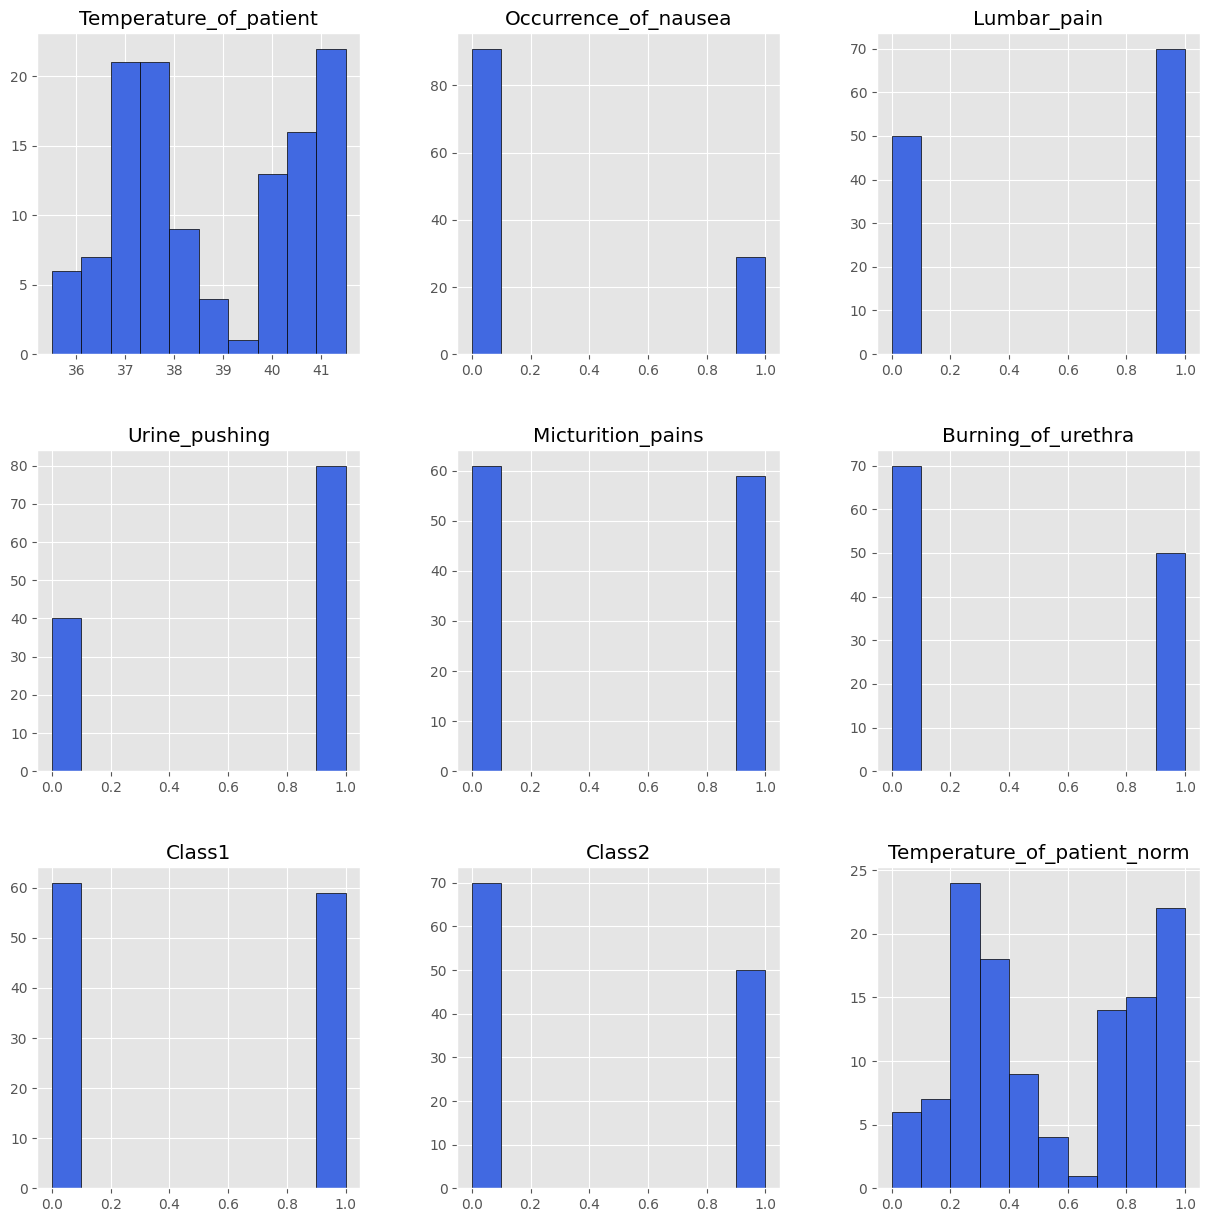

In [ ]:
# histogram
df.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

density histroam
* class1

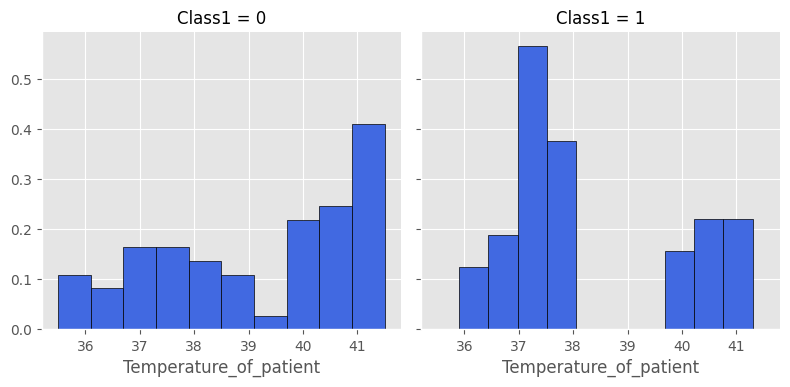

In [ ]:
# class1
# Relative frequency histogram 0
col = df.columns[0]
g = sns.FacetGrid(df, col = 'Class1', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

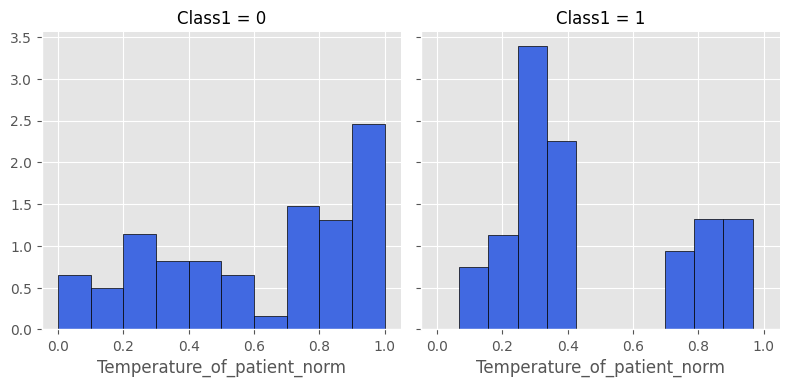

In [ ]:
# class1
# Relative frequency histogram - 추가된 온도 정규화값 8
col = df.columns[8]
g = sns.FacetGrid(df, col = 'Class1', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

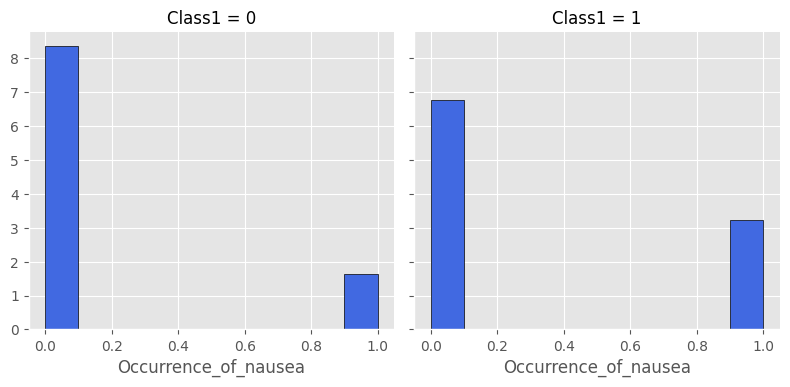

In [ ]:
# class1
# Relative frequency histogram 1 (class1)
col = df.columns[1]
g = sns.FacetGrid(df, col = 'Class1', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

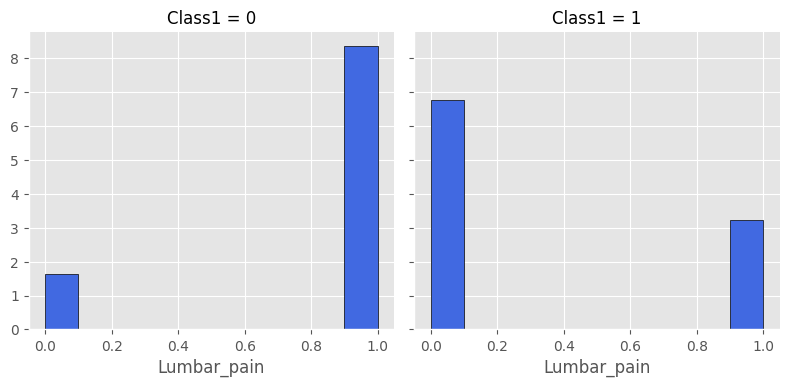

In [ ]:
# class1
# Relative frequency histogram 2
col = df.columns[2]
g = sns.FacetGrid(df, col = 'Class1', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

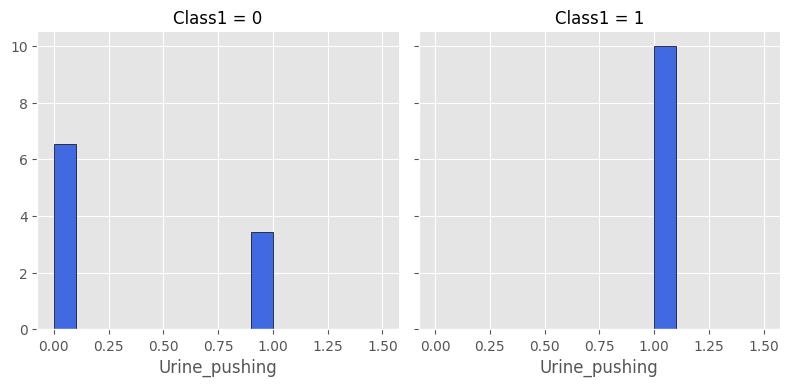

In [ ]:
# class1
# Relative frequency histogram 3
col = df.columns[3]
g = sns.FacetGrid(df, col = 'Class1', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

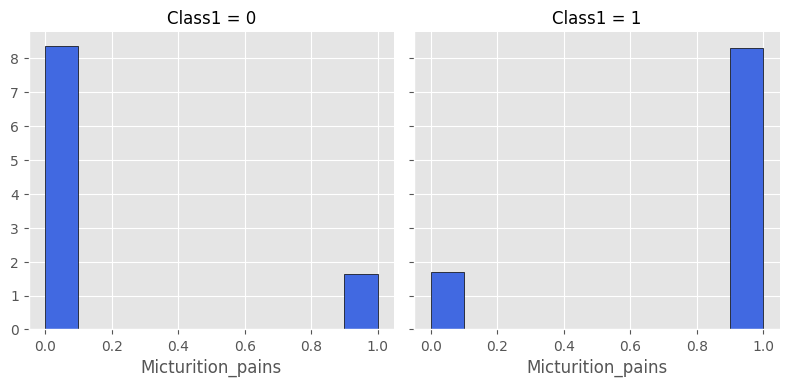

In [ ]:
# class1
# Relative frequency histogram 4
col = df.columns[4]
g = sns.FacetGrid(df, col = 'Class1', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

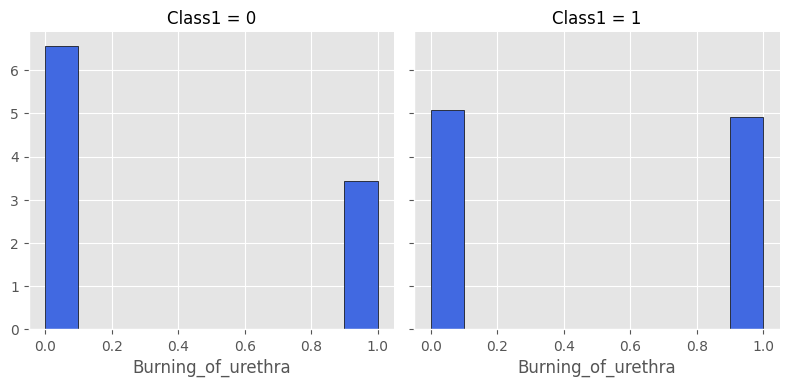

In [ ]:
# class1
# Relative frequency histogram 5
col = df.columns[5]
g = sns.FacetGrid(df, col = 'Class1', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

class2

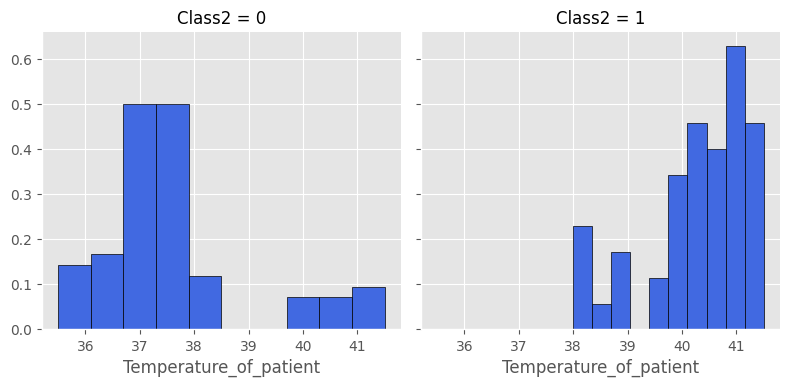

In [ ]:
# class2
# Relative frequency histogram 0
col = df.columns[0]
g = sns.FacetGrid(df, col = 'Class2', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

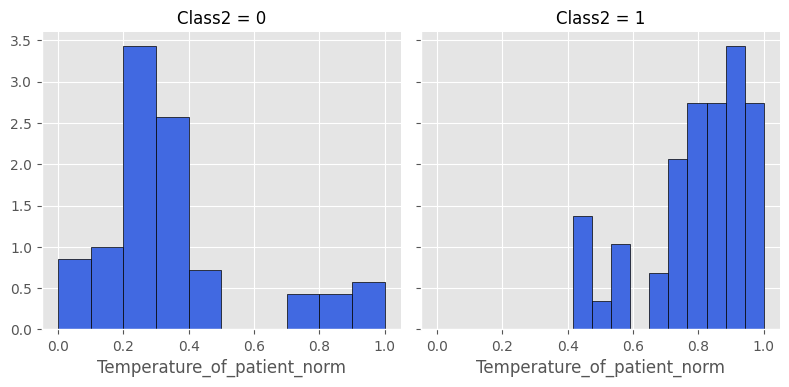

In [ ]:
# class2
# Relative frequency histogram - 정규화 추가 8
col = df.columns[8]
g = sns.FacetGrid(df, col = 'Class2', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

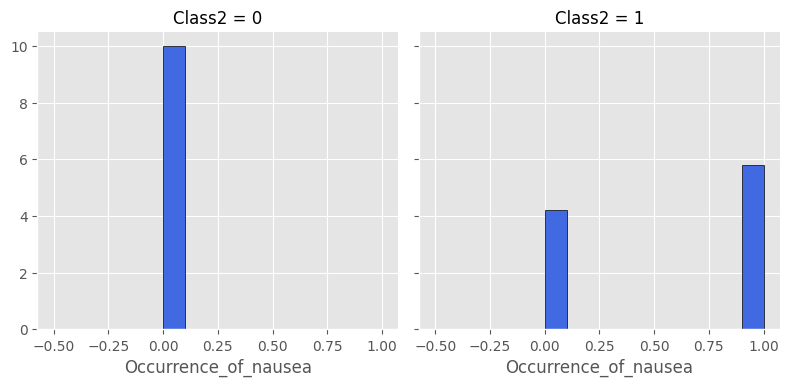

In [ ]:
|# class2
# Relative frequency histogram 1
col = df.columns[1]
g = sns.FacetGrid(df, col = 'Class2', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

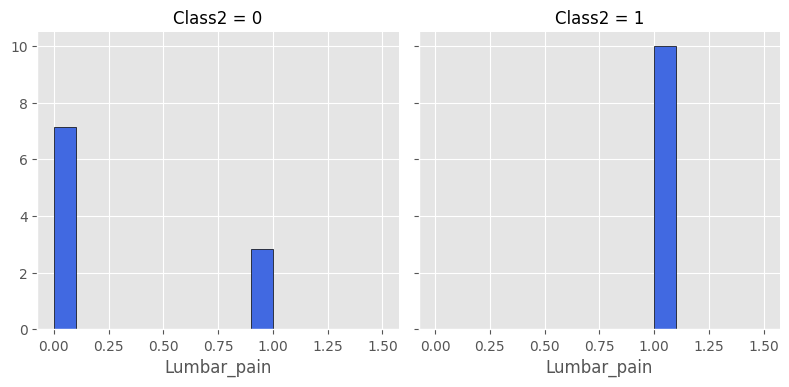

In [ ]:
# class2
# Relative frequency histogram 2
col = df.columns[2]
g = sns.FacetGrid(df, col = 'Class2', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

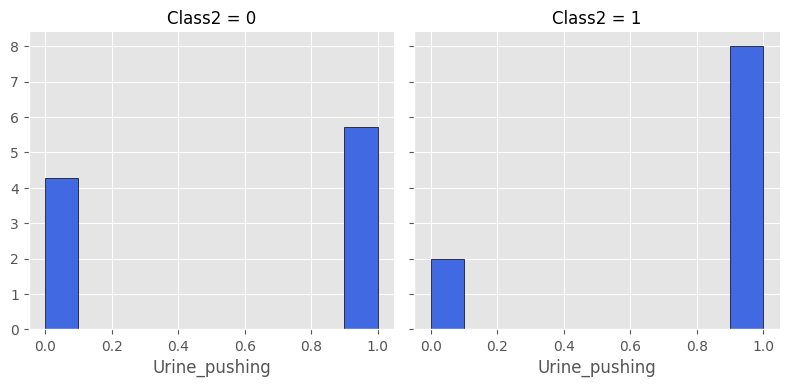

In [ ]:
# class2
# Relative frequency histogram 3
col = df.columns[3]
g = sns.FacetGrid(df, col = 'Class2', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

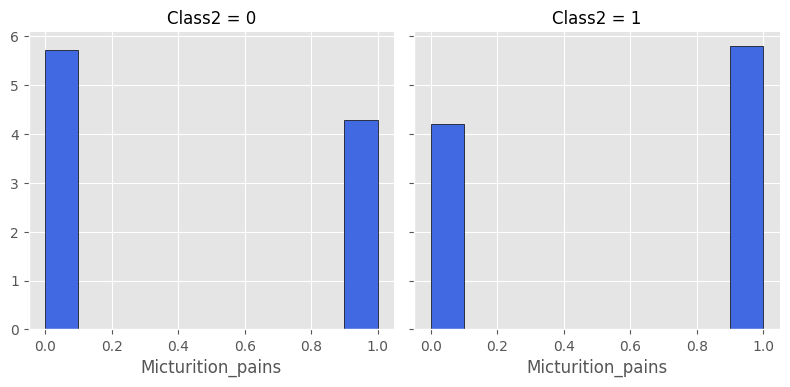

In [ ]:
# class2
# Relative frequency histogram 4
col = df.columns[4]
g = sns.FacetGrid(df, col = 'Class2', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

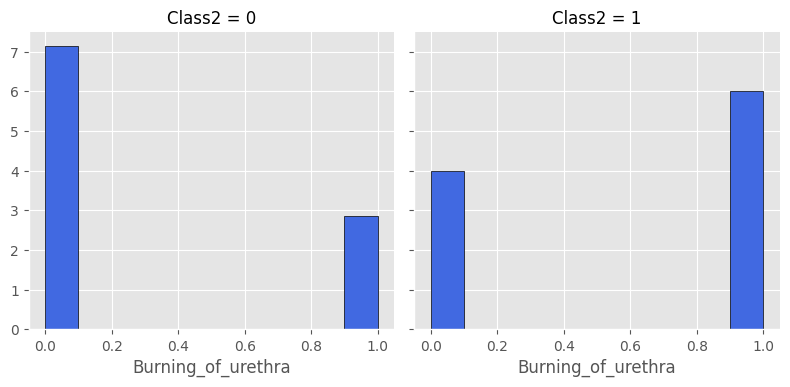

In [ ]:
# class2
# Relative frequency histogram 5
col = df.columns[5]
g = sns.FacetGrid(df, col = 'Class2', height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

## 2.2 Correlation heatmap

전체 dataset

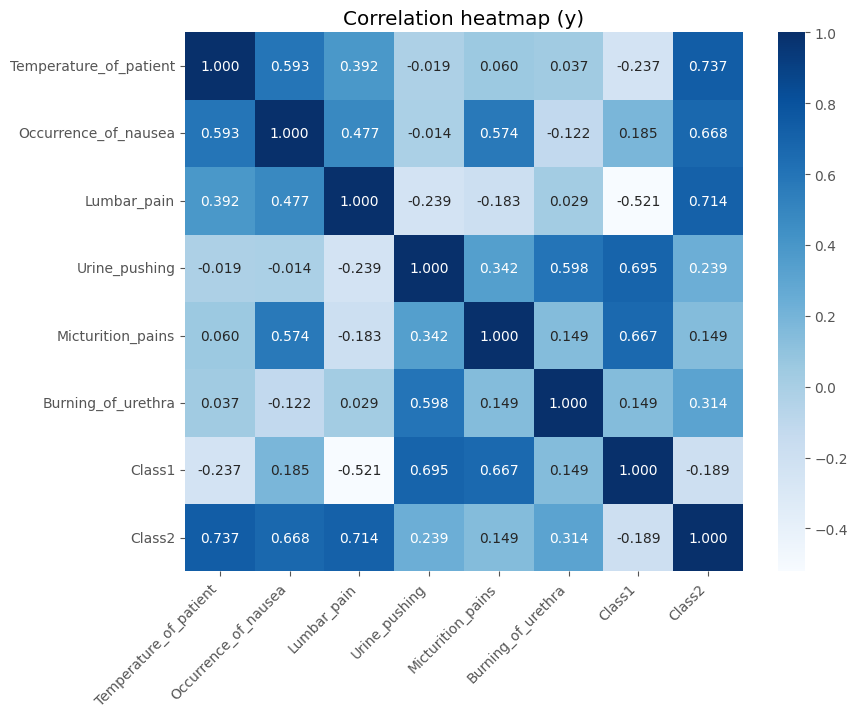

In [ ]:

plt.figure(figsize = (9,7))
g = sns.heatmap(df.corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y)')
plt.show()

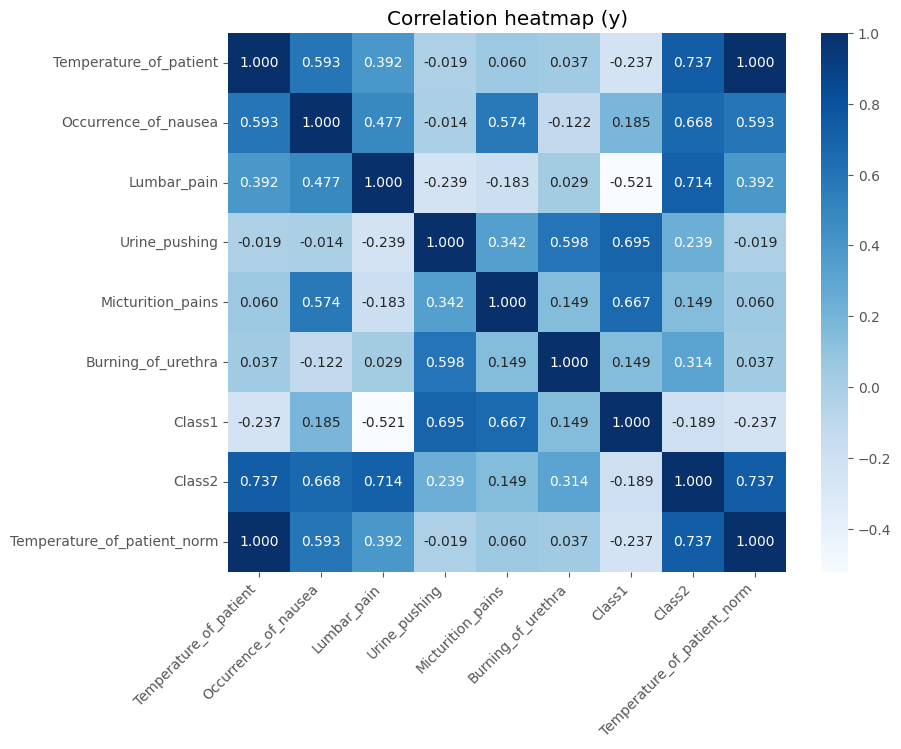

In [ ]:
# 정규화 추가
plt.figure(figsize = (9,7))
g = sns.heatmap(df.corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y)')
plt.show()

* class1

In [ ]:
class1_name='Class1'
df_y1_byclass1 = df[df[class1_name]==1]
df_y0_byclass1 = df[df[class1_name]==0]

In [ ]:
print(df_y1_byclass1['Urine_pushing'].value_counts())
print(df_y0_byclass1['Urine_pushing'].value_counts())

Urine_pushing
1    59
Name: count, dtype: int64
Urine_pushing
0    40
1    21
Name: count, dtype: int64


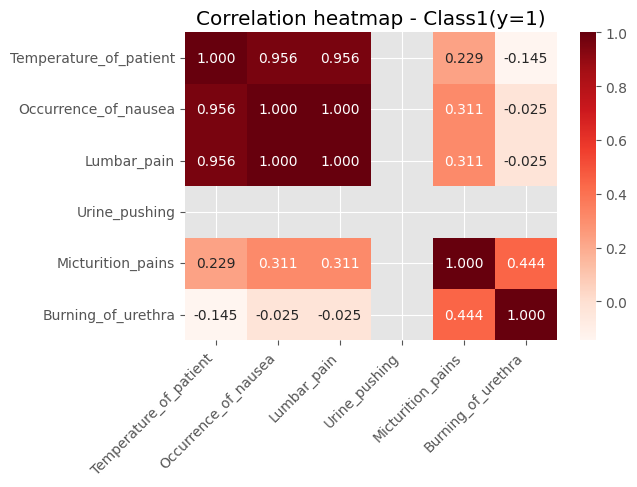

In [ ]:
# y = 1인 subset
plt.figure(figsize = (6,4))
g = sns.heatmap(df_y1_byclass1.iloc[:, :6].corr(), annot = True, cmap='Reds', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap - Class1(y=1)')
plt.show()

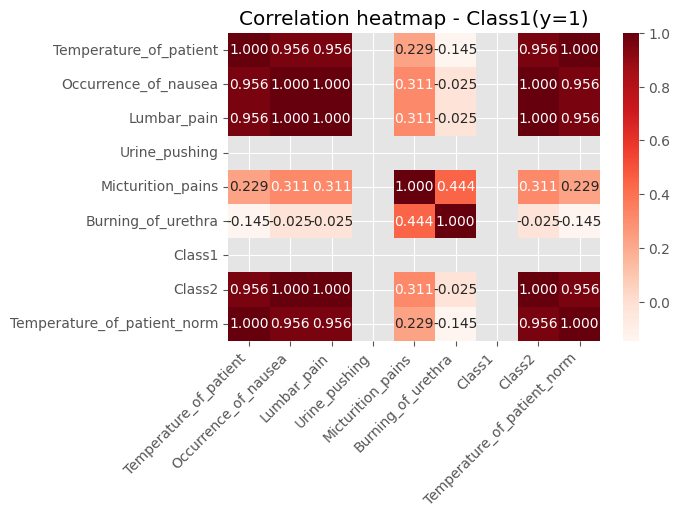

In [ ]:
# y = 1인 subset
# 정규화 추가
plt.figure(figsize = (6,4))
g = sns.heatmap(df_y1_byclass1.corr(), annot = True, cmap='Reds', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap - Class1(y=1)')
plt.show()

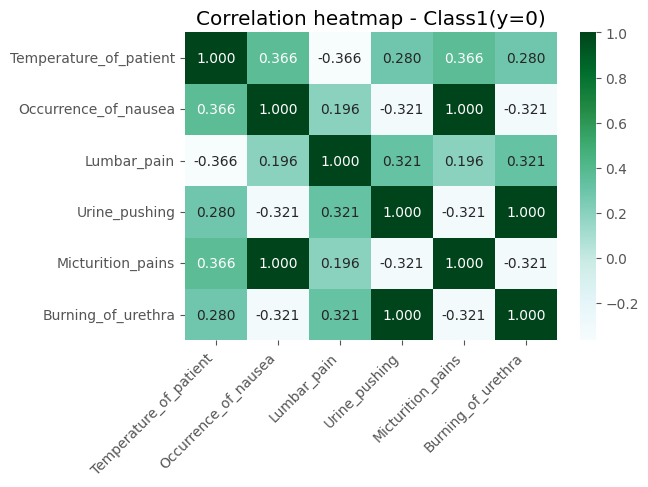

In [ ]:
# y = 0인 subset
plt.figure(figsize = (6,4))
g = sns.heatmap(df_y0_byclass1.iloc[:, :6].corr(), annot = True, cmap='BuGn', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap - Class1(y=0)')
plt.show()

class2

In [ ]:
class2_name='Class2'
df_y1_byclass2 = df[df[class2_name]==1]
df_y0_byclass2 = df[df[class2_name]==0]

In [ ]:
print(df_y1_byclass2['Lumbar_pain'].value_counts())
print(df_y0_byclass2['Lumbar_pain'].value_counts())

Lumbar_pain
1    50
Name: count, dtype: int64
Lumbar_pain
0    50
1    20
Name: count, dtype: int64


In [ ]:
print(df_y1_byclass2['Occurrence_of_nausea'].value_counts())
print(df_y0_byclass2['Occurrence_of_nausea'].value_counts())

Occurrence_of_nausea
1    29
0    21
Name: count, dtype: int64
Occurrence_of_nausea
0    70
Name: count, dtype: int64


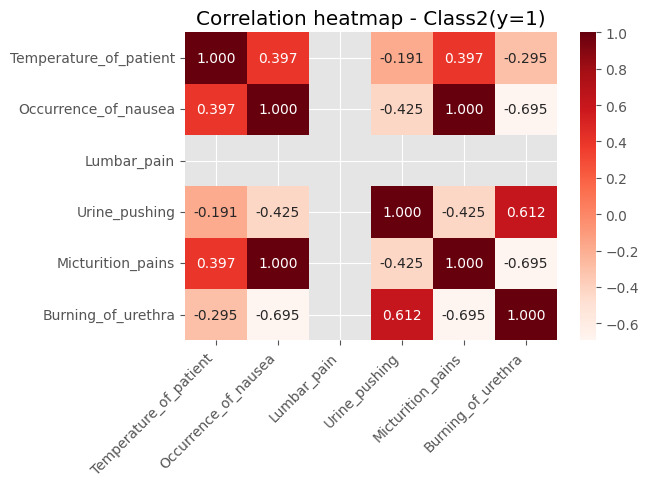

In [ ]:
# y = 1인 subset
plt.figure(figsize = (6,4))
g = sns.heatmap(df_y1_byclass2.iloc[:, :6].corr(), annot = True, cmap='Reds', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap - Class2(y=1)')
plt.show()

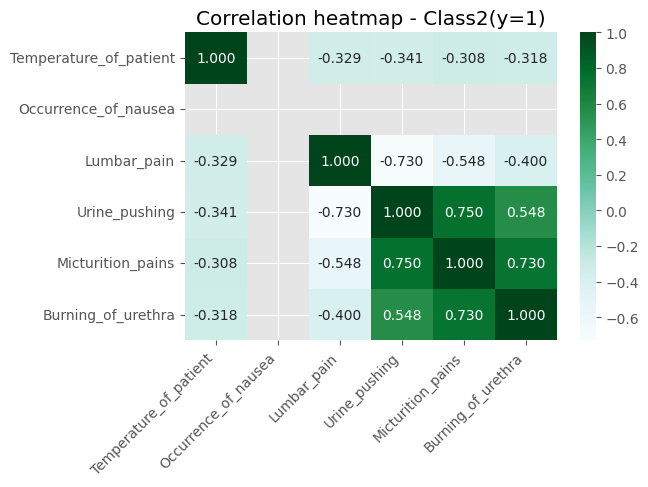

In [ ]:
# y = 0인 subset
plt.figure(figsize = (6,4))
g = sns.heatmap(df_y0_byclass2.iloc[:, :6].corr(), annot = True, cmap='BuGn', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap - Class2(y=0)')
plt.show()

## 2.3 Scatter plot

* class1

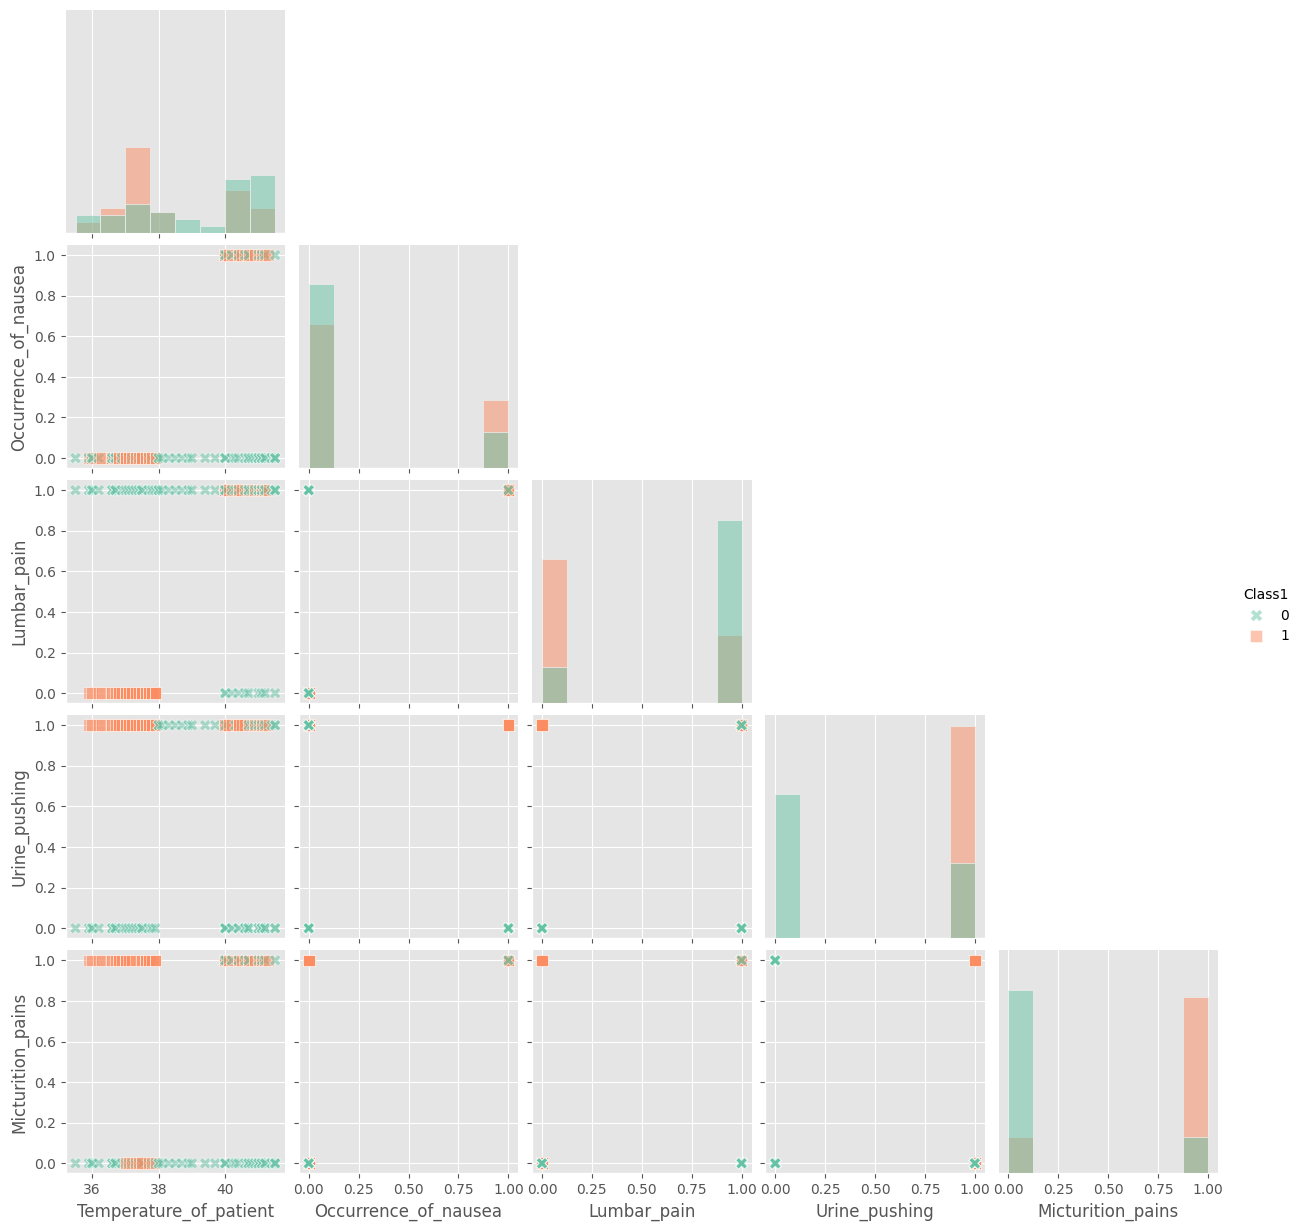

In [ ]:
predictors = df.columns[0:5]
sns.pairplot(df,vars=predictors, hue = 'Class1', hue_order=[0,1],
             diag_kind='hist',
             kind = 'scatter', markers=["X", "s"], plot_kws={"s": 70, "alpha" : 0.5},
             palette="Set2",corner=True)
plt.show()

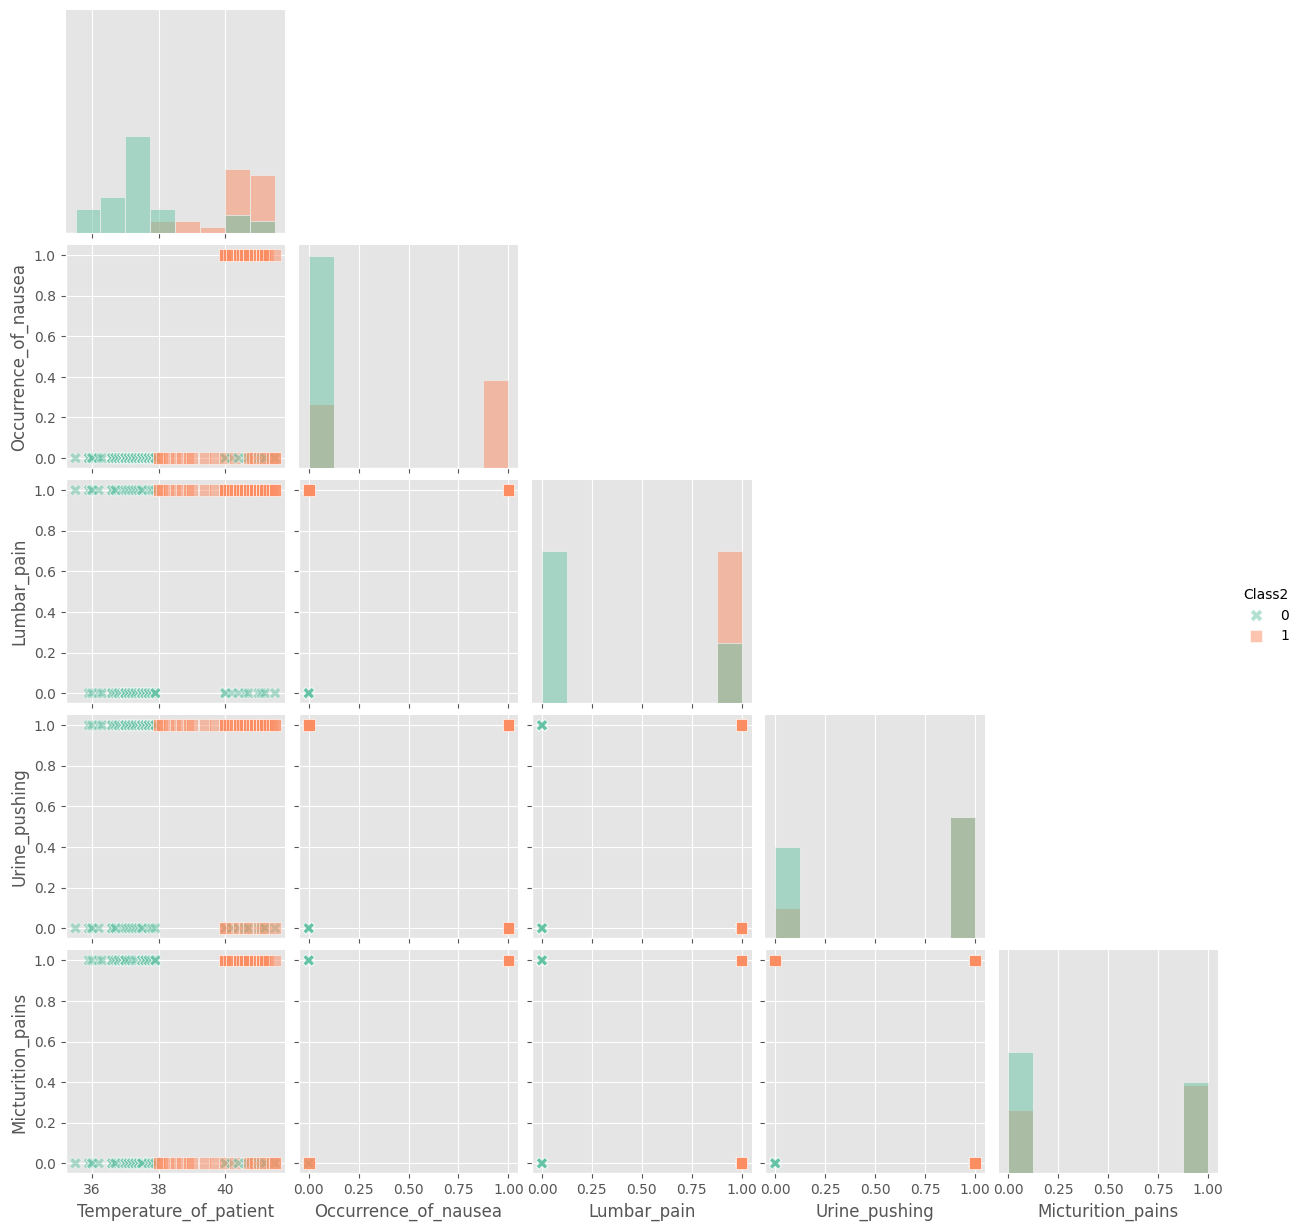

In [ ]:
predictors = df.columns[0:5]
sns.pairplot(df,vars=predictors, hue = 'Class2', hue_order=[0,1],
             diag_kind='hist',
             kind = 'scatter', markers=["X", "s"], plot_kws={"s": 70, "alpha" : 0.5},
             palette="Set2",corner=True)
plt.show()

# Classification model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [ ]:
X = df.iloc[:, [1,2,3,4,5,8]]
print(X)
y = df.iloc[:, -3]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

     Occurrence_of_nausea  Lumbar_pain  Urine_pushing  Micturition_pains  \
0                       0            1              0                  0   
1                       0            0              1                  1   
2                       0            1              0                  0   
3                       0            0              1                  1   
4                       0            1              0                  0   
..                    ...          ...            ...                ...   
115                     0            1              1                  0   
116                     0            0              0                  0   
117                     1            1              0                  1   
118                     0            1              1                  0   
119                     0            1              1                  0   

     Burning_of_urethra  Temperature_of_patient_norm  
0                     0         

decision tree, logstic regression, random forest, gradient boosting, naive-bayse, k-nn

Decision Tree:
Best Params: {'max_depth': 3, 'min_samples_split': 2}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Logistic Regression:
Best Params: {'C': 0.1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest:
Best Params: {'max_features': 'auto', 'n_estimators': 10}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Gradient Boosting:
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Naive Bayes:
Best Params: {}

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.75      1.00      0

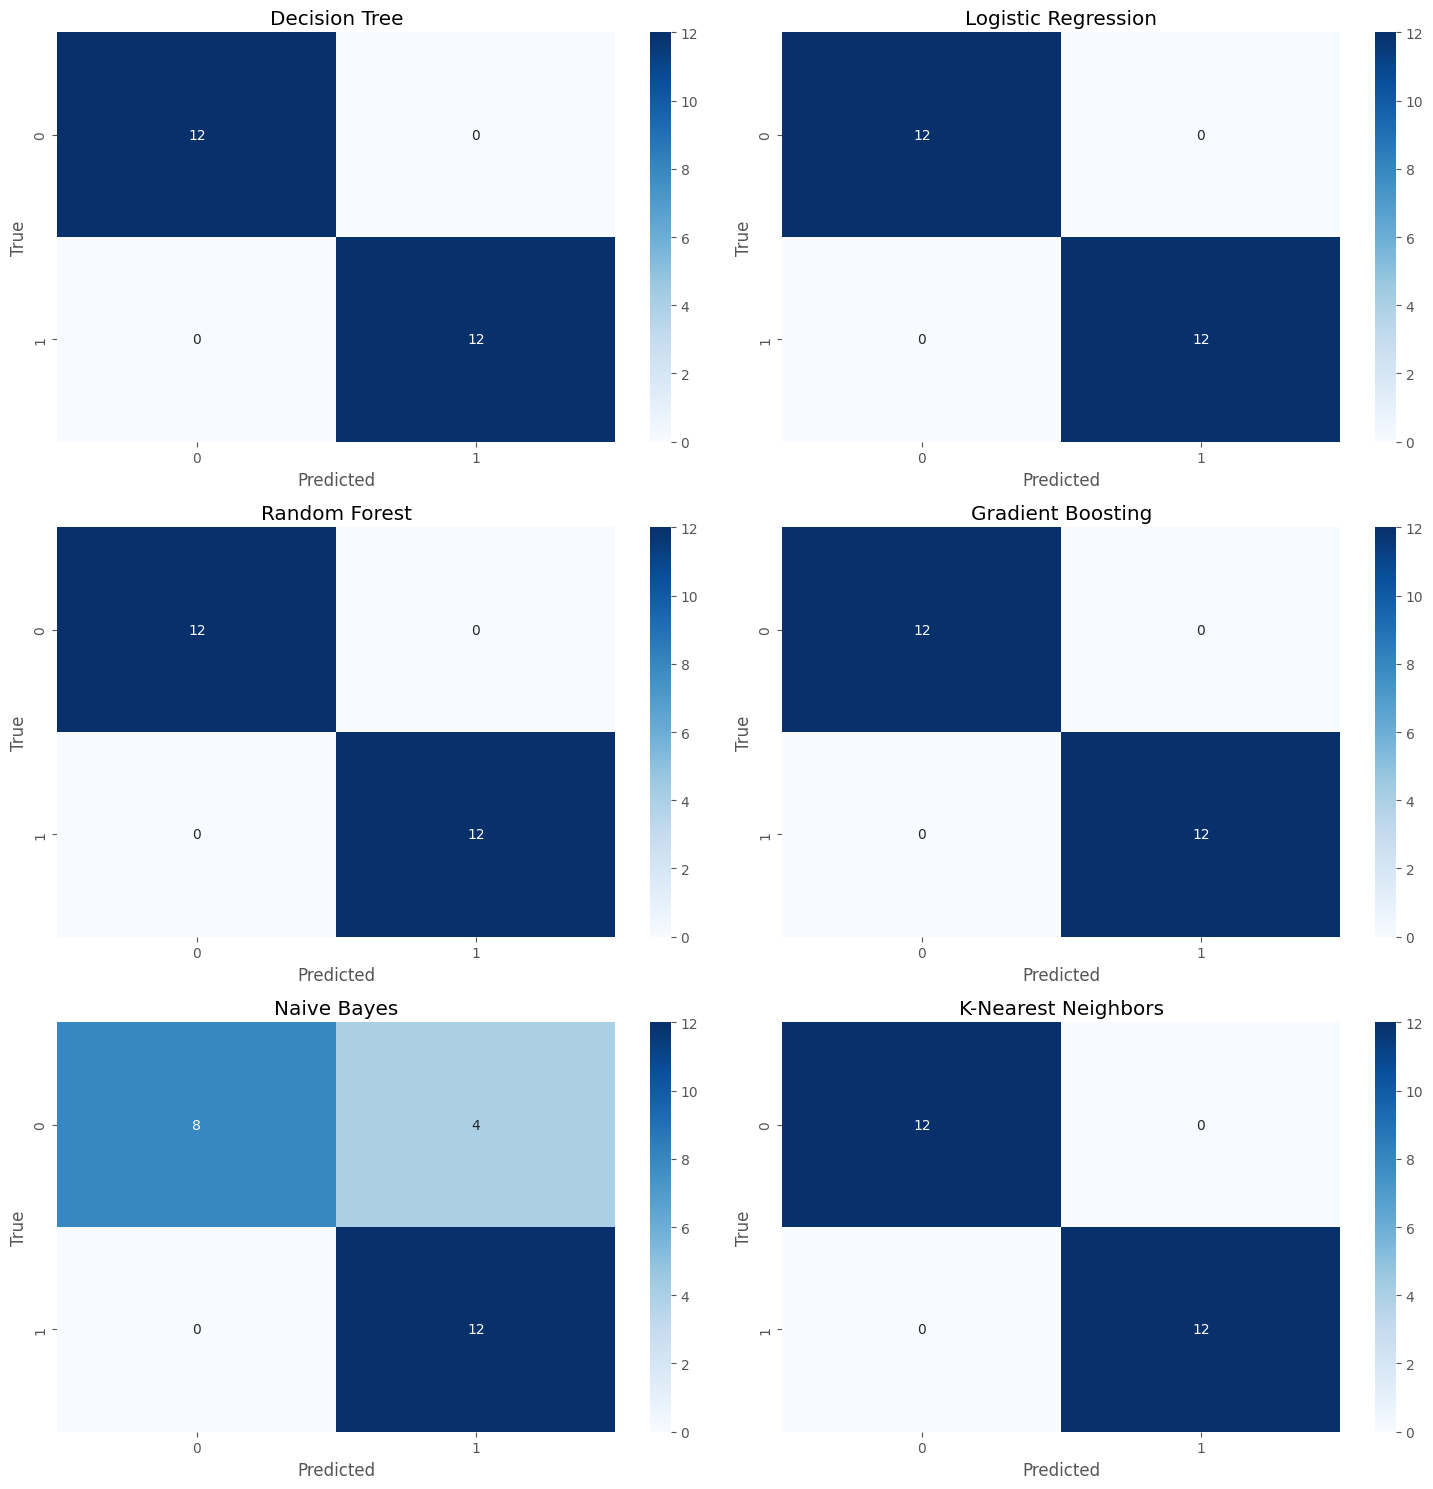

In [ ]:
param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'Naive Bayes': {
        # GaussianNB has no hyperparameters to tune in this context
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}


classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


results = pd.DataFrame(columns=['Classifier', 'Best Params', 'Accuracy'])

best_classifiers = {}
for name, clf in classifiers.items():
    if param_grids[name]:
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_clf = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_clf = clf
        best_clf.fit(X_train, y_train)
        best_params = {}

    best_classifiers[name] = best_clf
    y_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{name}:\nBest Params: {best_params}\n")
    print(classification_report(y_test, y_pred))

    # results = results.append({'Classifier': name, 'Best Params': best_params, 'Accuracy': accuracy, 'F1_Score': f1}, ignore_index=True)
    results = pd.concat([results, pd.DataFrame({'Classifier': [name], 'Best Params': [best_params], 'Accuracy': [accuracy], 'F1_Score': [f1]})], ignore_index=True)

print(results)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for i, (name, clf) in enumerate(best_classifiers.items()):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# class2에 대해서 진행
X = df.iloc[:, [1,2,3,4,5,8]]
# print(X)
y = df.iloc[:, -2]
# print(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# 증강된 데이터를 원래 특성 이름으로 변환
X_smote_df = pd.DataFrame(X_smote, columns=X.columns)

X = df.iloc[:, [1,2,3,4,5,8]]
print(X)
y = df.iloc[:, -3]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

# 증강된 데이터로 모델 학습 및 평가
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_smote_df, y_smote, test_size=0.2, stratify=y_smote, random_state=42)

     Occurrence_of_nausea  Lumbar_pain  Urine_pushing  Micturition_pains  \
0                       0            1              0                  0   
1                       0            0              1                  1   
2                       0            1              0                  0   
3                       0            0              1                  1   
4                       0            1              0                  0   
..                    ...          ...            ...                ...   
115                     0            1              1                  0   
116                     0            0              0                  0   
117                     1            1              0                  1   
118                     0            1              1                  0   
119                     0            1              1                  0   

     Burning_of_urethra  Temperature_of_patient_norm  
0                     0         

Decision Tree:
Best Params: {'max_depth': 3, 'min_samples_split': 2}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

Logistic Regression:
Best Params: {'C': 0.01}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest:
Best Params: {'max_features': 'auto', 'n_estimators': 10}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

Gradient Boosting:
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

Naive Bayes:
Best Params: {}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1

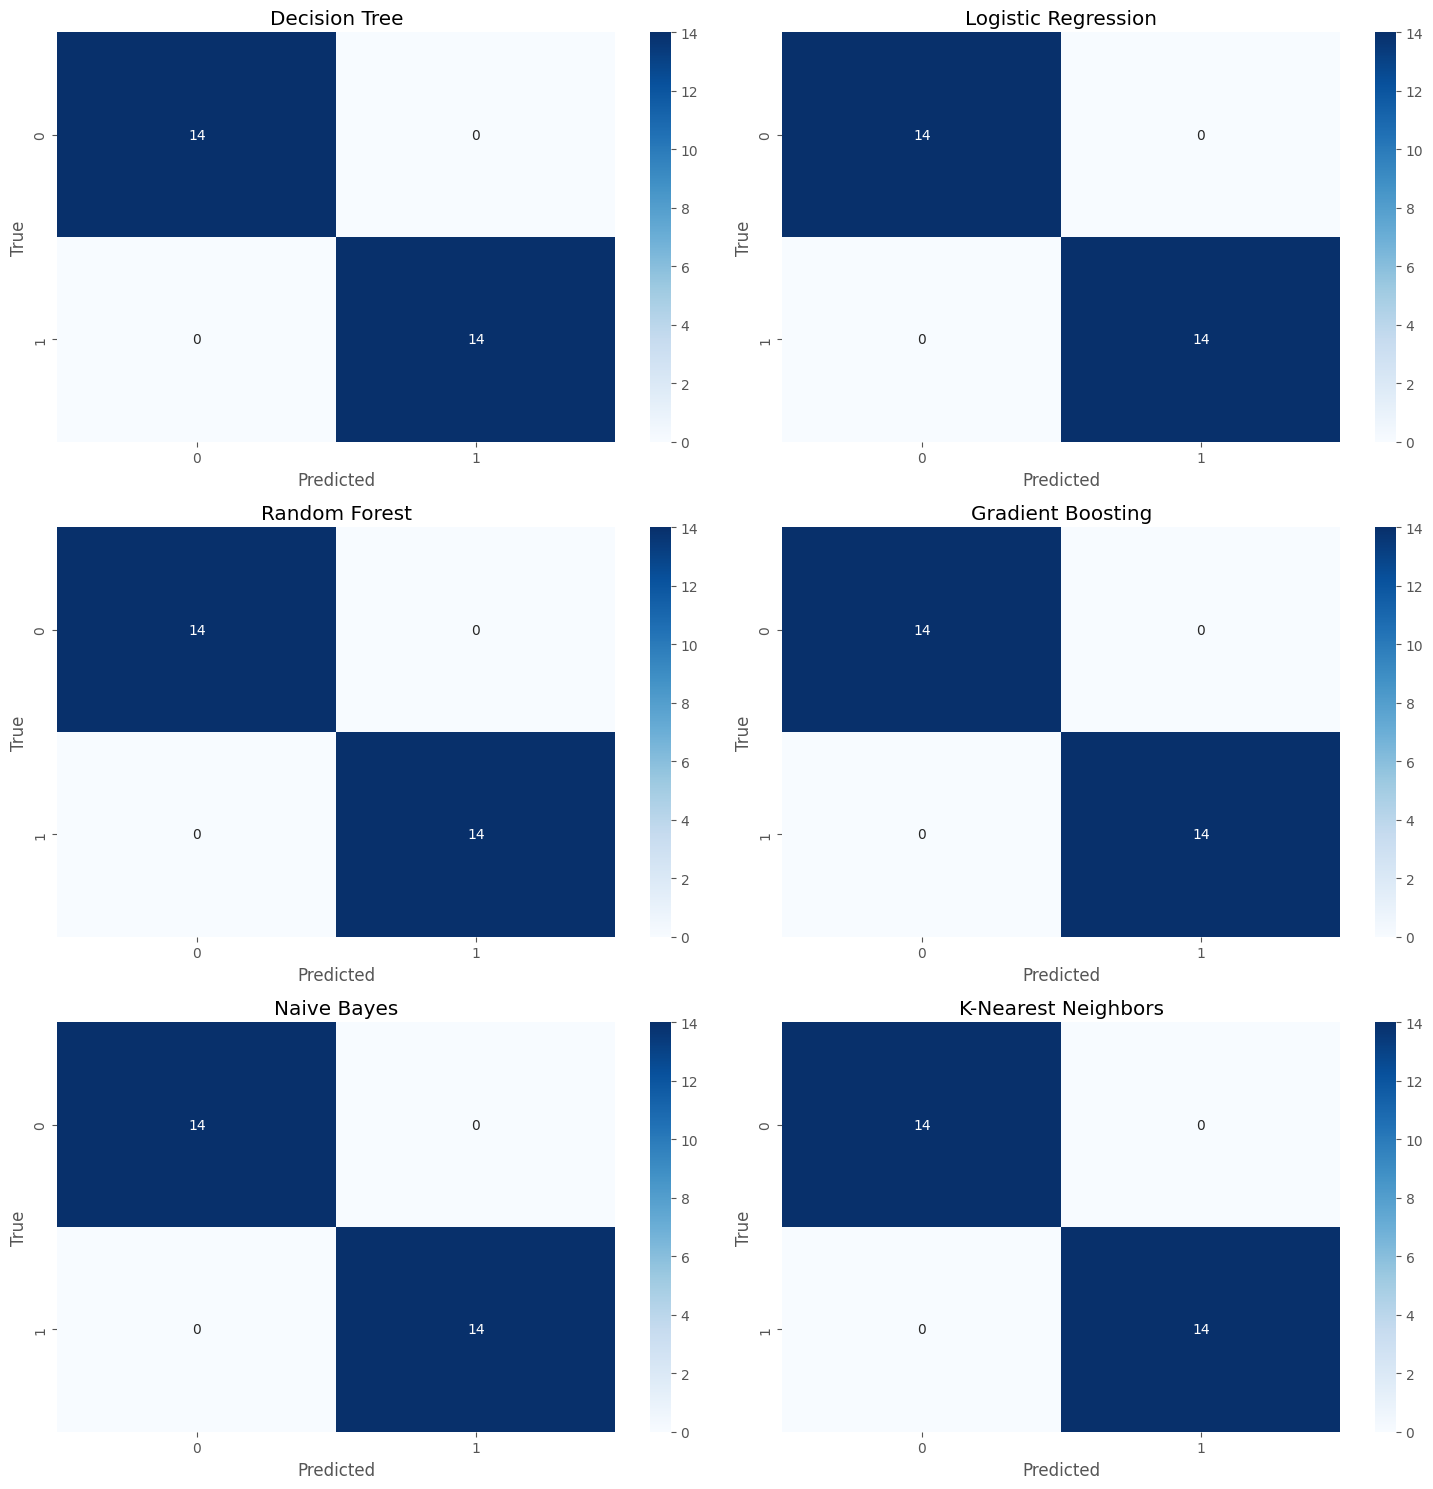

In [ ]:
param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'Naive Bayes': {
        # GaussianNB has no hyperparameters to tune in this context
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}


classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


results = pd.DataFrame(columns=['Classifier', 'Best Params', 'Accuracy'])

best_classifiers = {}
for name, clf in classifiers.items():
    if param_grids[name]:
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_new_train, y_new_train)

        best_clf = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_clf = clf
        best_clf.fit(X_new_train, y_new_train)
        best_params = {}

    best_classifiers[name] = best_clf
    y_pred = best_clf.predict(X_new_test)
    accuracy = accuracy_score(y_new_test, y_pred)
    f1 = f1_score(y_new_test, y_pred, average='weighted')

    print(f"{name}:\nBest Params: {best_params}\n")
    print(classification_report(y_new_test, y_pred))

    # results = results.append({'Classifier': name, 'Best Params': best_params, 'Accuracy': accuracy, 'F1_Score': f1}, ignore_index=True)
    results = pd.concat([results, pd.DataFrame({'Classifier': [name], 'Best Params': [best_params], 'Accuracy': [accuracy], 'F1_Score': [f1]})], ignore_index=True)

print(results)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for i, (name, clf) in enumerate(best_classifiers.items()):
    y_pred = clf.predict(X_new_test)
    cm = confusion_matrix(y_new_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 교차 검증을 위한 StratifiedKFold 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증을 사용하여 모델 평가
best_classifiers = {}
results = pd.DataFrame(columns=['Classifier', 'Best Params', 'Accuracy', 'F1_Score'])

for name, clf in classifiers.items():
    if param_grids[name]:
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=skf, n_jobs=-1)
        grid_search.fit(X_smote_df, y_smote)
        best_clf = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_clf = clf
        best_params = {}

    best_classifiers[name] = best_clf

    # 교차 검증을 사용하여 모델 성능 평가
    cv_scores = cross_val_score(best_clf, X_smote_df, y_smote, cv=skf, scoring='accuracy')
    cv_f1_scores = cross_val_score(best_clf, X_smote_df, y_smote, cv=skf, scoring='f1_weighted')

    print(f"{name}:\nBest Params: {best_params}\n")
    print(f"CV Accuracy Scores: {cv_scores}")
    print(f"CV F1 Scores: {cv_f1_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    print(f"Mean CV F1 Score: {cv_f1_scores.mean():.4f}")

    results = pd.concat([results, pd.DataFrame({'Classifier': [name],
                                                'Best Params': [best_params],
                                                'Accuracy': [cv_scores.mean()],
                                                'F1_Score': [cv_f1_scores.mean()]})],
                        ignore_index=True)

print(results)

Decision Tree:
Best Params: {'max_depth': 3, 'min_samples_split': 2}

CV Accuracy Scores: [1.         0.92857143 1.         1.         1.        ]
CV F1 Scores: [1.         0.92820513 1.         1.         1.        ]
Mean CV Accuracy: 0.9857
Mean CV F1 Score: 0.9856
Logistic Regression:
Best Params: {'C': 0.01}

CV Accuracy Scores: [1. 1. 1. 1. 1.]
CV F1 Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000
Mean CV F1 Score: 1.0000
Random Forest:
Best Params: {'max_features': 'log2', 'n_estimators': 50}

CV Accuracy Scores: [1.         0.92857143 1.         1.         1.        ]
CV F1 Scores: [1.         0.92820513 1.         1.         1.        ]
Mean CV Accuracy: 0.9857
Mean CV F1 Score: 0.9856
Gradient Boosting:
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

CV Accuracy Scores: [1.         0.92857143 1.         1.         1.        ]
CV F1 Scores: [1.         0.92820513 1.         1.         1.        ]
Mean CV Accuracy: 0.9857
Mean CV F1 Score: 0.9856
Naiv

In [ ]:
results

,Classifier,Best Params,Accuracy,F1_Score
0,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.985714,0.985641
1,Logistic Regression,{'C': 0.01},1.000000,1.000000
2,Random Forest,"{'max_features': 'log2', 'n_estimators': 50}",0.985714,0.985641
3,Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.985714,0.985641
4,Naive Bayes,{},0.950000,0.949322
5,K-Nearest Neighbors,"{'n_neighbors': 3, 'weights': 'uniform'}",1.000000,1.000000


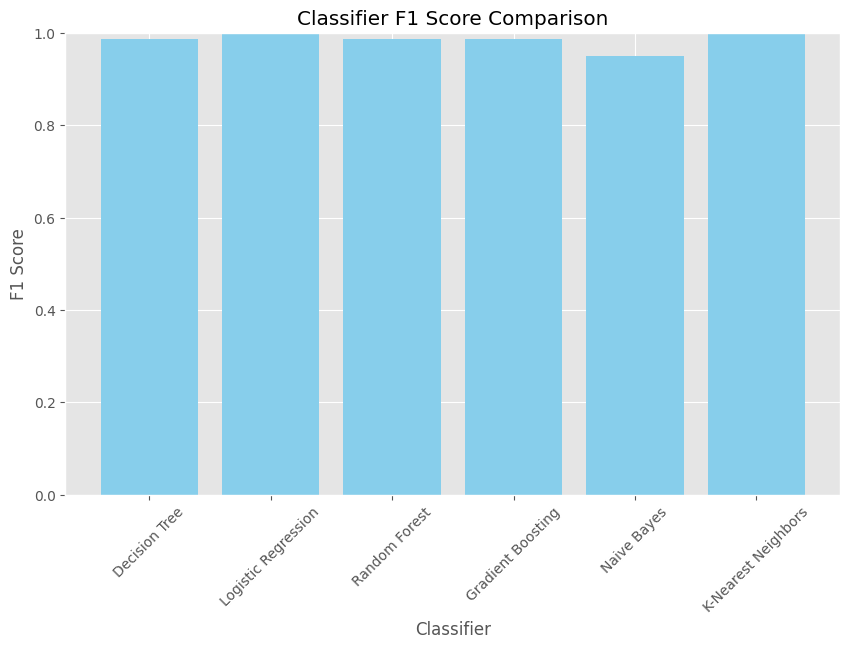

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results['Classifier'], results['F1_Score'], color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('Classifier F1 Score Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

1.0


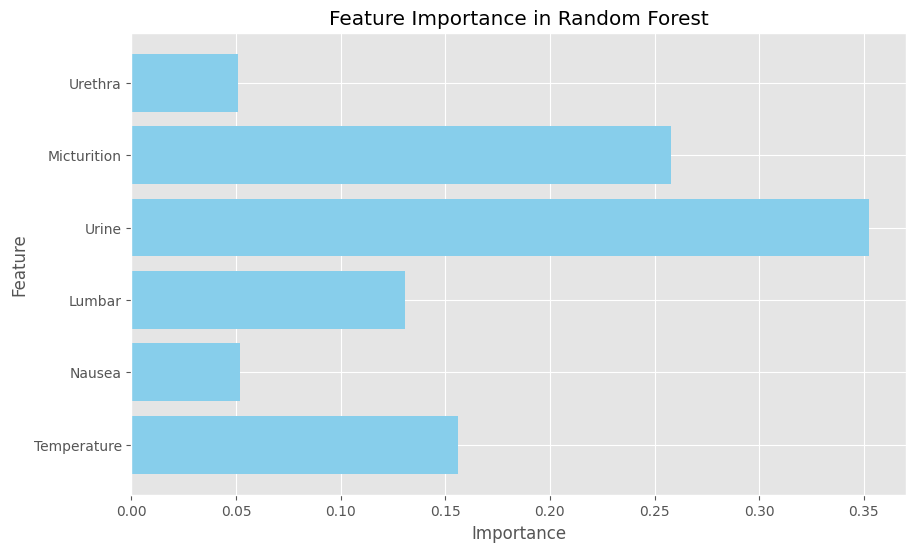

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
# 나이브베이즈 모델 학습
NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# 각 클래스별 사전 확률
print("Class Priors:", NB.class_prior_)

# 각 클래스별 특징의 평균
print("Class Means (theta):", NB.theta_)

# 각 클래스별 특징의 분산
print("Class Variances (sigma):", NB.var_)

# 각 샘플에 대한 로그 가능도
log_probs = NB.predict_log_proba(X_test)
print("Log Probabilities:", log_probs)

# 각 샘플이 각 클래스에 속할 확률
probs = NB.predict_proba(X_test)
print("Posterior Probabilities:", probs)

0.875
Class Priors: [0.52083333 0.47916667]
Class Means (theta): [[39.312       0.18        0.82        0.36        0.18        0.36      ]
 [38.36521739  0.32608696  0.32608696  1.          0.80434783  0.5       ]]
Class Variances (sigma): [[3.13065600e+00 1.47600003e-01 1.47600003e-01 2.30400003e-01
  1.47600003e-01 2.30400003e-01]
 [2.73835539e+00 2.19754256e-01 2.19754256e-01 3.16638889e-09
  1.57372404e-01 2.50000003e-01]]
Log Probabilities: [[-1.37584948e+01 -1.05867305e-06]
 [ 0.00000000e+00 -1.57908578e+08]
 [-1.44150383e+01 -5.49071021e-07]
 [-1.09408064e+01 -1.77203375e-05]
 [-1.12988431e+01 -1.23873237e-05]
 [-9.52634014e+00 -7.29086196e-05]
 [-1.19064763e+01 -6.74659278e-06]
 [-1.46512975e+01 -4.33533291e-07]
 [-6.11367599e+00 -2.21485405e-03]
 [ 0.00000000e+00 -1.57908582e+08]
 [ 0.00000000e+00 -1.57908582e+08]
 [-1.45717916e+01 -4.69409028e-07]
 [ 0.00000000e+00 -1.57908582e+08]
 [-5.98776211e+00 -2.51242676e-03]
 [ 0.00000000e+00 -1.57908581e+08]
 [ 0.00000000e+00 -1.579

# Color DT

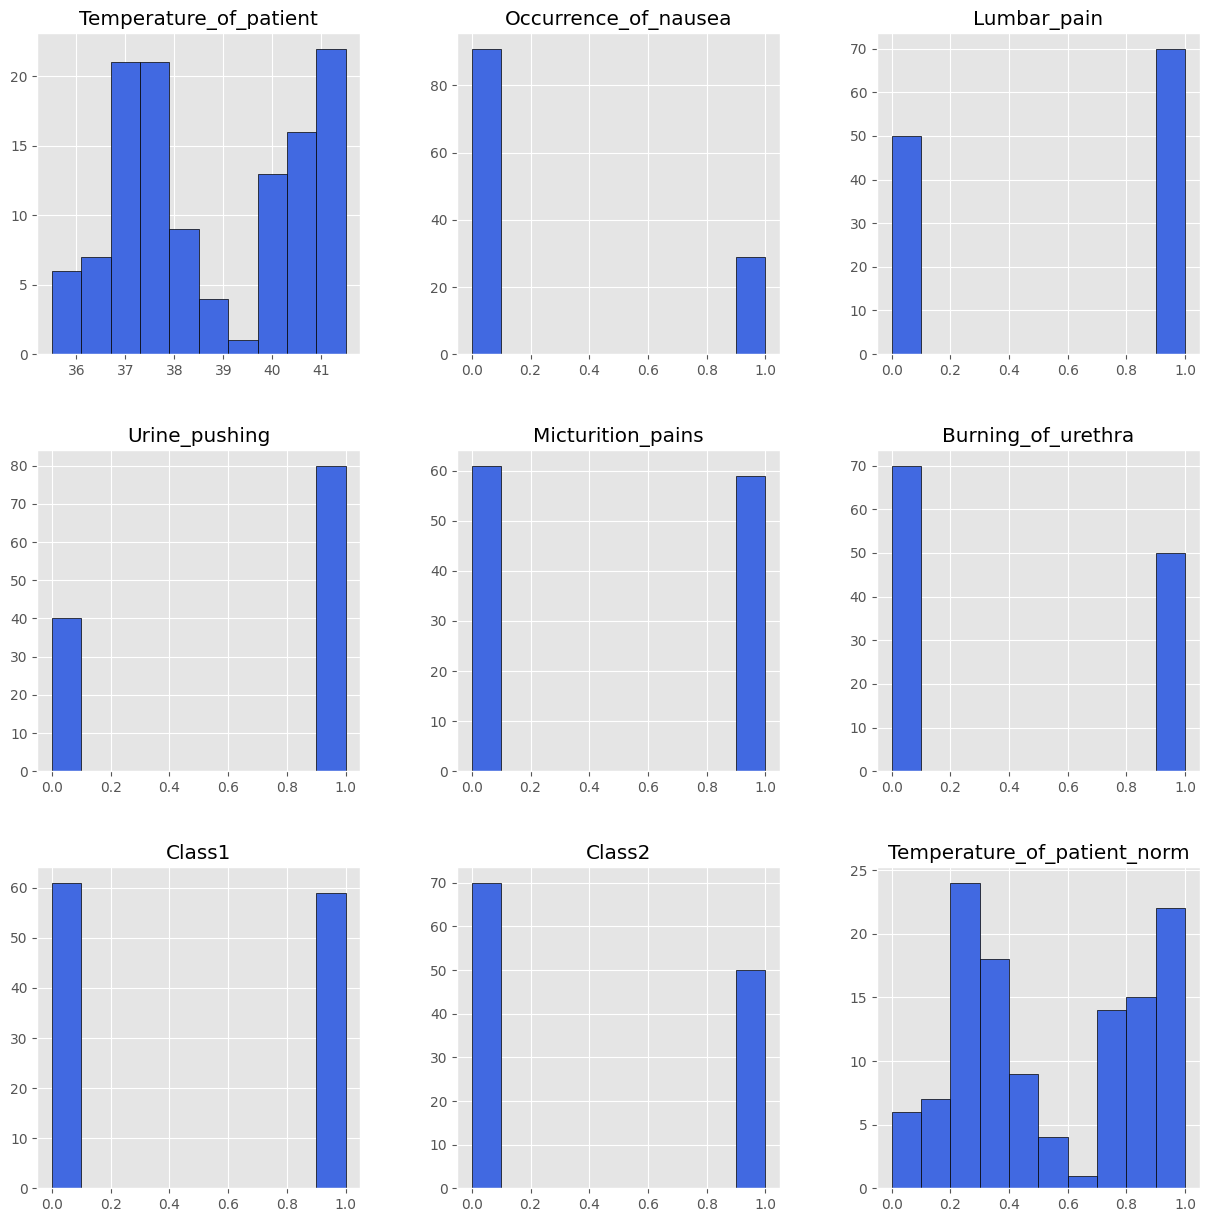

In [ ]:
# histogram
df.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv('acute_inflammations.csv')
df = dataset.copy()

df.columns = ['Temperature_of_patient', 'Occurrence_of_nausea','Lumbar_pain','Urine_pushing', 'Micturition_pains', 'Burning_of_urethra',
              'Class1', 'Class2']
df.head()

,Temperature_of_patient,Occurrence_of_nausea,Lumbar_pain,Urine_pushing,Micturition_pains,Burning_of_urethra,Class1,Class2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [ ]:
df = df.drop(columns='Class2')

In [ ]:
# Feature name and class name
feature_names = ['Temperature', 'Nausea',
       'Lumbar', 'Urine',
       'Micturition', 'Urethra']
df.columns = feature_names + ['Class1'] # Feature를 더 간략한 이름으로 변경
class_names = ['Inflammations', 'None'] # 0: 'Begnign', 1: 'Malignant'
# df['Class'] = df['Class'].map({'Benign': 0, 'Malignant': 1}) # Benign : 0, Malignant: 1로 변경


X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# 일반 Decision tree

1.0


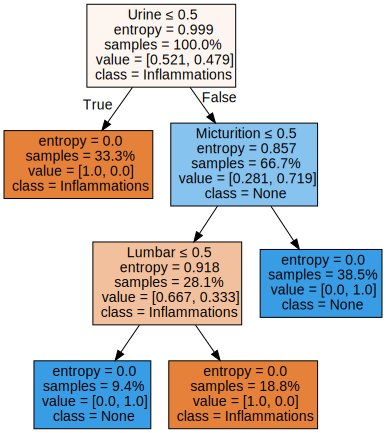

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Decision tree fitting
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03, max_depth=5, random_state=12)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# Visualization
dot_data = export_graphviz(dt, out_file=None,
                      feature_names=feature_names,
                      class_names=class_names,
                      filled=True, rounded=False,
                      proportion=True,
                      special_characters=True)
visulize_dt = graphviz.Source(dot_data)
visulize_dt

Color DT

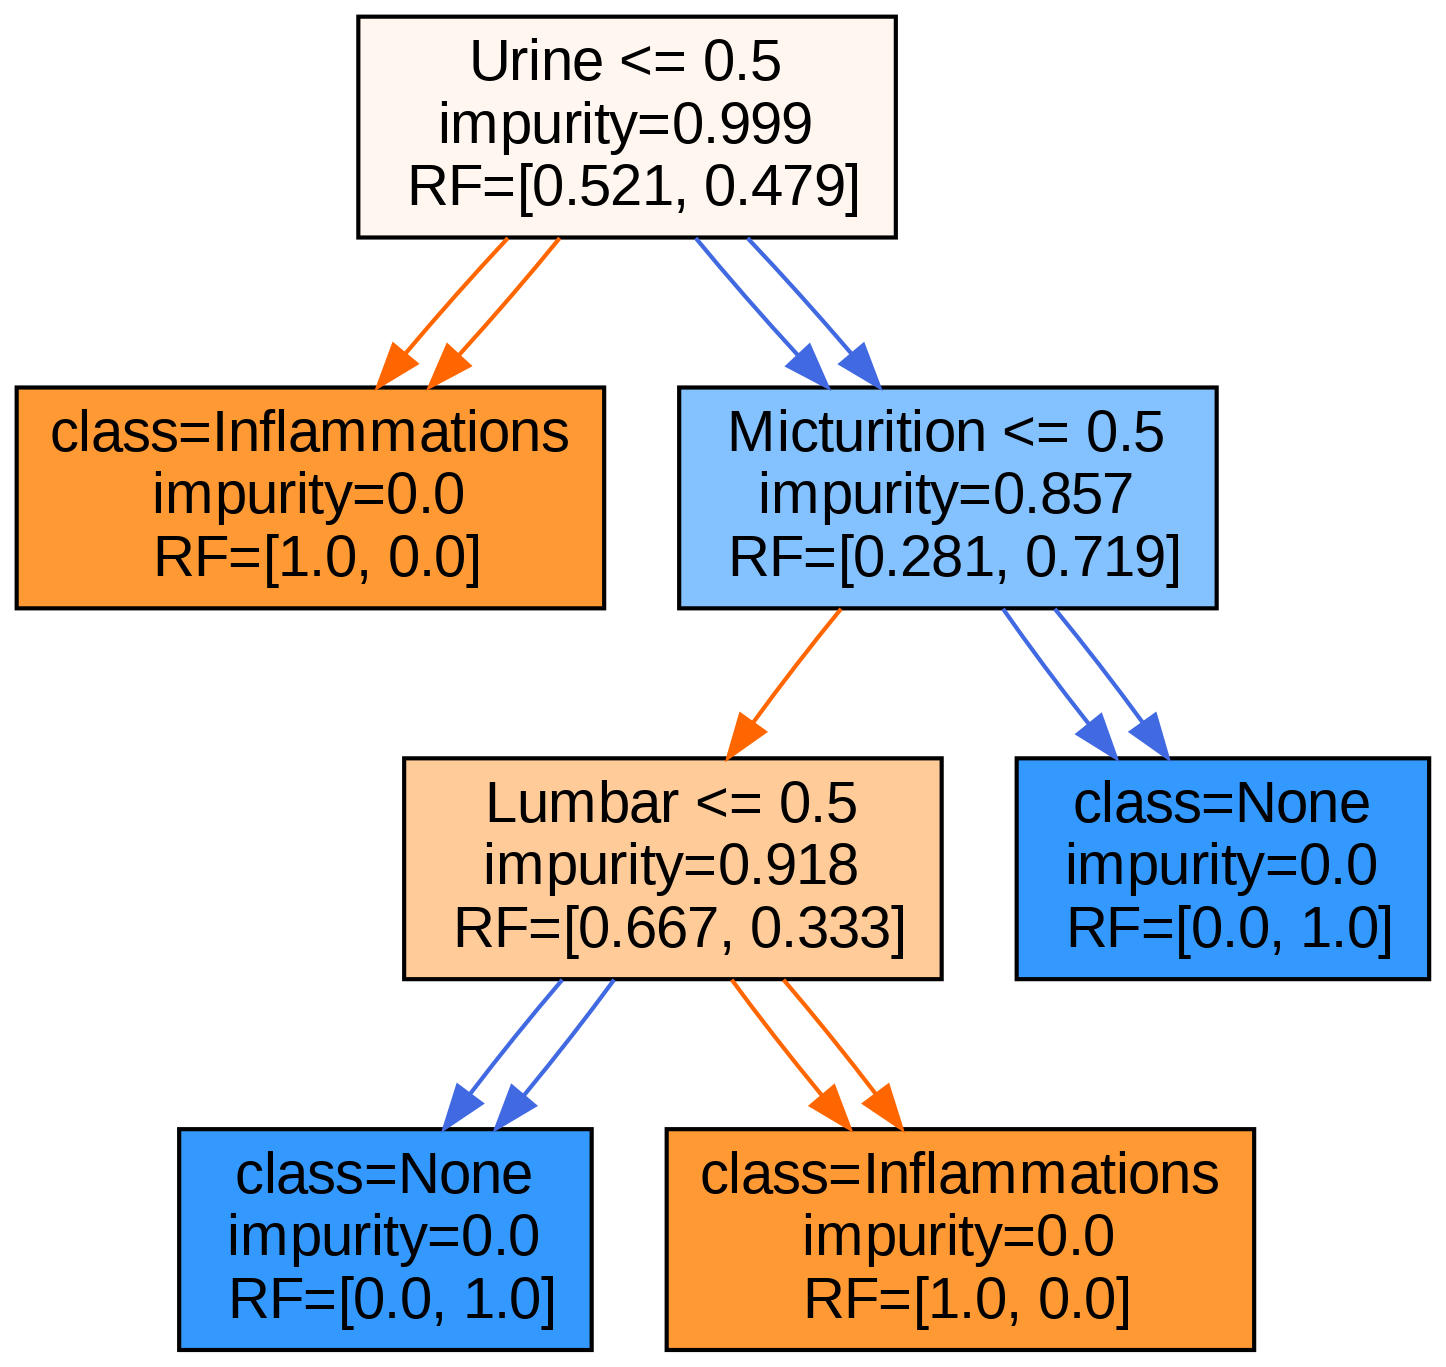

Color Decision Tree saved as 'color_dt.png'


In [ ]:
from colorDT_sklearn import colorDT

color_dt = colorDT(model=dt, feature_names=feature_names, class_names=class_names)
color_dt.display_color_tree()
color_dt.save_color_tree(output_file='color_dt')

In [ ]:
color_dt.display_rules(X_train, y_train)


Rules:
Rule (Type 1)
Original Rule:
IF Urine <= 0.5 THEN class = Inflammations (RF: 1.0)
Compact Rule:
IF Urine <= 0.5 THEN class = Inflammations (RF: 1.0)

Rule (Type 1)
Original Rule:
IF Urine > 0.5 and Micturition <= 0.5 and Lumbar <= 0.5 THEN class = None (RF: 1.0)
Compact Rule:
IF Urine > 0.5 and Lumbar <= 0.5 THEN class = None (RF: 1.0)

Rule (Type 1)
Original Rule:
IF Urine > 0.5 and Micturition <= 0.5 and Lumbar > 0.5 THEN class = Inflammations (RF: 1.0)
Compact Rule:
IF Micturition <= 0.5 and Lumbar > 0.5 THEN class = Inflammations (RF: 1.0)

Rule (Type 1)
Original Rule:
IF Urine > 0.5 and Micturition > 0.5 THEN class = None (RF: 1.0)
Compact Rule:
IF Urine > 0.5 and Micturition > 0.5 THEN class = None (RF: 1.0)




In [ ]:
epsilon=0.07
color_dt.type_rf_table(epsilon)

,Rule Count,RF Diff < Epsilon,Ratio
Rule Type,,,
Type 1-n,2.0,2.0,1.0
Type 1-y,2.0,2.0,1.0
Type 2-m1,NaN,NaN,NaN
Type 2-m2-n,NaN,NaN,NaN
Type 2-m2-y,NaN,NaN,NaN


In [ ]:
# Define the parameters
epsilon = 0.07
num_iterations = 30 # 최소 10번 이상

summary_tables = []
for _ in range(num_iterations):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2)
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03)
    dt.fit(X_train, y_train)

    color_dt = colorDT(model=dt, feature_names=feature_names, class_names=class_names)
    color_dt.classify_rules(X_train, y_train)

    type_rf_table = color_dt.type_rf_table(epsilon)
    summary_tables.append(type_rf_table)

combined_summary_table = pd.concat(summary_tables)
averaged_summary_table = combined_summary_table.groupby(combined_summary_table.index).mean()
averaged_summary_table.round(3)

,Rule Count,RF Diff < Epsilon,Ratio
Rule Type,,,
Type 1-n,2.0,2.0,1.0
Type 1-y,2.0,2.0,1.0
Type 2-m1,NaN,NaN,NaN
Type 2-m2-n,NaN,NaN,NaN
Type 2-m2-y,NaN,NaN,NaN
